In [5]:
# 支持向量机 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

# Use seaborn plotting defaults 

import seaborn as sns;sns.set()


In [6]:
### 例子 
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=50,centers=2,random_state=0
               ,cluster_std=0.6)

In [7]:
X.shape

(50, 2)

In [8]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0])

In [9]:
y.shape

(50,)

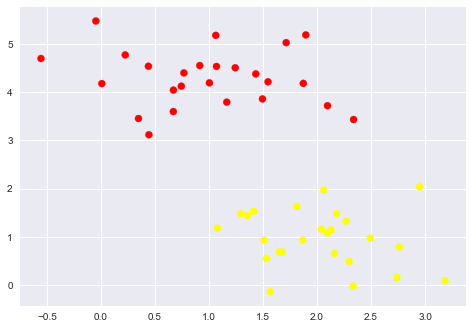

In [10]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

(-1, 3.5)

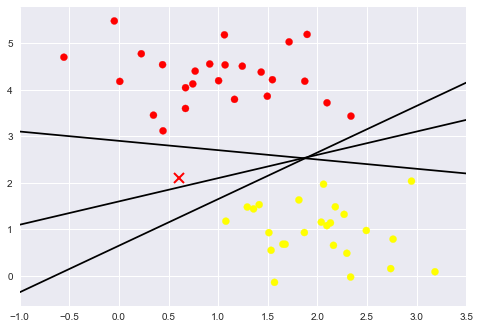

In [11]:
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
    
plt.xlim(-1,3.5)

In [12]:
### Support Vector Machines: 最小化 雷区 

(-1, 3.5)

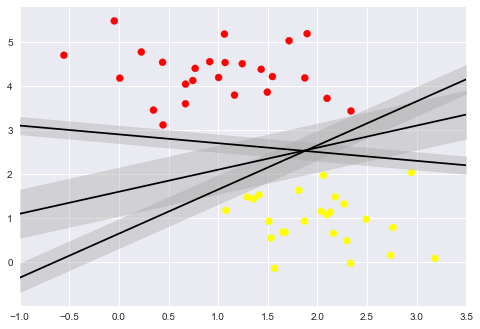

In [13]:
xfit=np.linspace(-1,3.5) 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)

plt.xlim(-1,3.5)


In [14]:
### 训练一个基本的SVM 

In [15]:
from sklearn.svm import SVC # 'Support vector classifier'
model=SVC(kernel='linear')
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
#绘图函数 
def plot_svc_decision_function(model,ax=None,plot_support=True):
    """ Plot the decision function for a 2D SVC"""
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    # create grid to evaluate model 
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    # plt decision boundary and marginx 
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    # plot support vectors 
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s=300,linewidth=1,facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

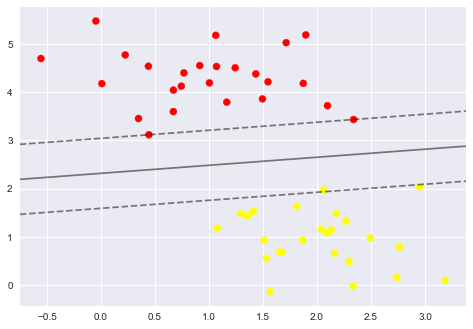

In [17]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

In [18]:
model.support_vectors_

array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

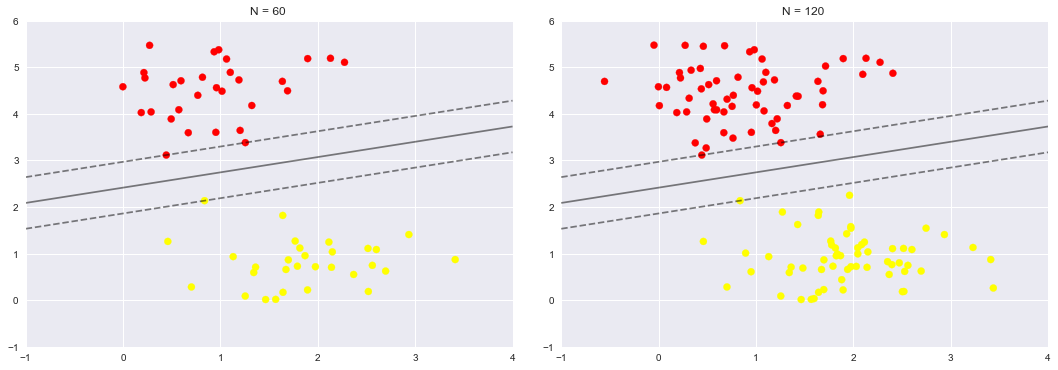

In [19]:
def plot_svm(N=100,ax=None):
    X,y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.60)
    X=X[:N]
    y=y[:N]
    model=SVC(kernel='linear',C=1E10)
    model.fit(X,y)
    
    ax=ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc_decision_function(model,ax)

fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi,N in zip(ax,[60,120]):
    plot_svm(N,axi)
    axi.set_title('N = {0} '.format(N))
    


In [20]:
### 引入核函数的SVM

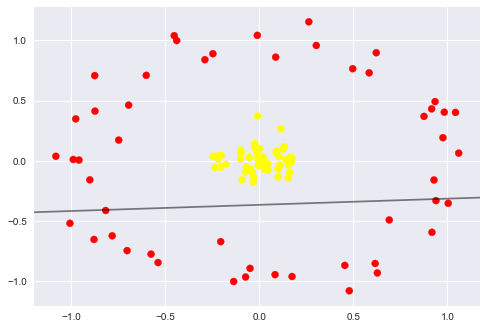

In [21]:
from sklearn.datasets.samples_generator import make_circles
X,y=make_circles(100,factor=0.1,noise=0.1)

clf=SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)


In [22]:
X.shape

(100, 2)

In [23]:
y.shape

(100,)

In [24]:
# 利用核变换 加入新的维度 

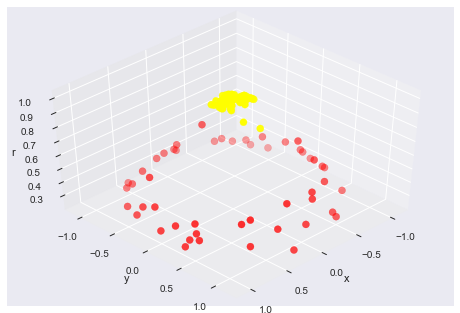

In [25]:
from mpl_toolkits import mplot3d
r=np.exp(-(X**2).sum(1))
def plot_3d(elev=30,azim=30,X=X,y=y):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='autumn')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
plot_3d(elev=45,azim=45,X=X,y=y)

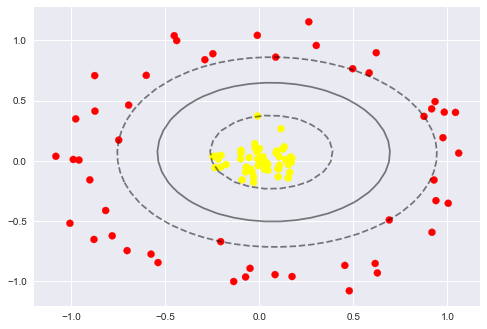

In [26]:
# 加入径向基函数
clf=SVC(kernel='rbf',C=1E6)
clf.fit(X,y)
# 这回牛逼了 ！
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf)

plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=300,lw=1,facecolors='none')


# 调节SVM参数：soft Margin问题 
# 调节C参数
* 当C趋近于无穷大时：意味着分类严格不能有错误
* 当C趋近于很小时：意味着可以有更大的错误容忍 

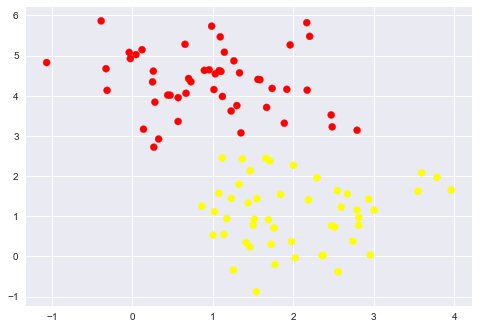

In [27]:
X,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

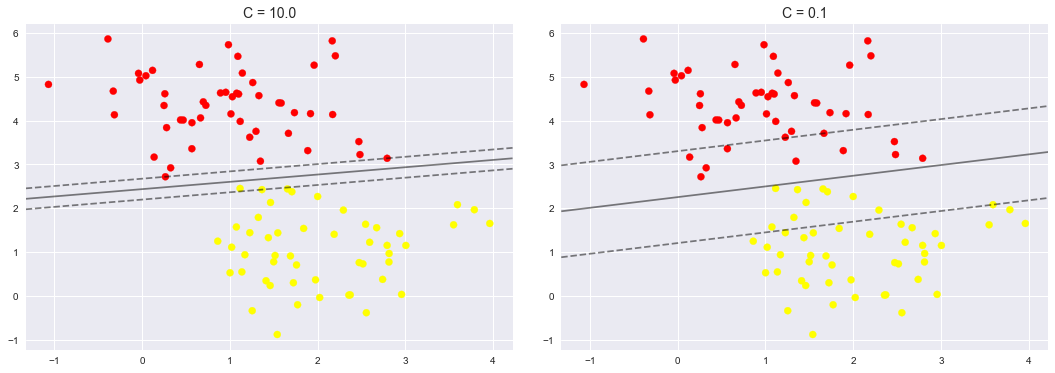

In [28]:
X,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)
fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for axi,C in zip(ax,[10.0,0.1]):
    model=SVC(kernel='linear',C=C).fit(X,y)
    axi.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    plot_svc_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300,lw=1,facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C),size=14)

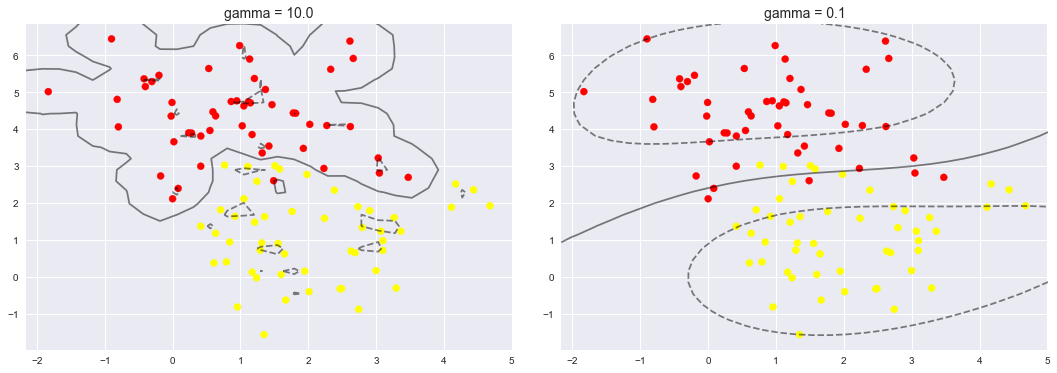

In [29]:
X,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.1)

fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for axi,gamma in zip(ax,[10.0,0.1]):
    model=SVC(kernel='rbf',gamma=gamma).fit(X,y)
    axi.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    plot_svc_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300,lw=1,facecolors='none')
    axi.set_title('gamma = {0:.1f}'.format(gamma),size=14)

### Example : Face Recognition 
As an 

In [30]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
print("tianokng")

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
tianokng


In [31]:
print("tianokng")

tianokng


Let's plot a few of these faces to see what we're working with:

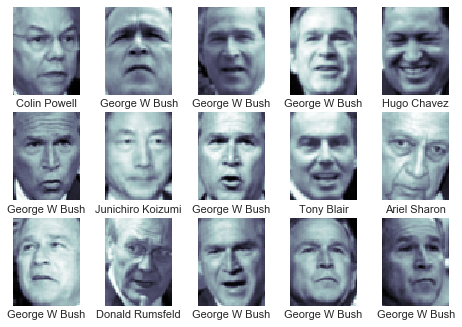

In [33]:
fig,ax=plt.subplots(3,5)
for i ,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

* 每个图的大小 是[62*47]
* 在这里我们就把每一个像素点当成了一个特征，但是这样的特征太多了，用PCA降维一下吧!

In [36]:
from sklearn.svm import SVC
# from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline

pca=PCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)

In [37]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=40)


使用grid search cross-validation 来选择我们的参数 

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid={'svc__C':[1,5,10],
           'svc__gamma':[0.0001,0.0005,0.001]}
grid=GridSearchCV(model,param_grid)

%time grid.fit(Xtrain,ytrain)
print(grid.best_params_)


CPU times: user 24.5 s, sys: 537 ms, total: 25.1 s
Wall time: 14.5 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [40]:
model=grid.best_estimator_
yfit=model.predict(Xtest)
yfit.shape

(337,)

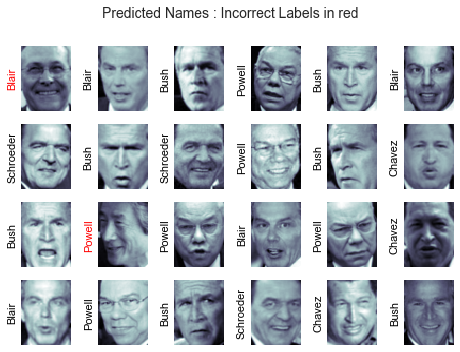

In [45]:
fig,ax=plt.subplots(4,6)
for i,axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color='black' if yfit[i]==ytest[i] else 'red')
    
fig.suptitle('Predicted Names : Incorrect Labels in red',size=14)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.75      0.75        16
     Colin Powell       0.71      0.89      0.79        54
  Donald Rumsfeld       0.82      0.79      0.81        34
    George W Bush       0.94      0.88      0.90       136
Gerhard Schroeder       0.81      0.78      0.79        27
      Hugo Chavez       0.80      0.89      0.84        18
Junichiro Koizumi       1.00      0.87      0.93        15
       Tony Blair       0.88      0.81      0.85        37

      avg / total       0.86      0.85      0.85       337



* 精度（precision)=正确预测的个数（TP）/ 被预测正确的个数 （TP+FP)
* 召回率(recall)=正确预测的个数(TP)/预测个数（TP+FN）
* F1=2  *精度召回率/（精度+召回率)*

/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


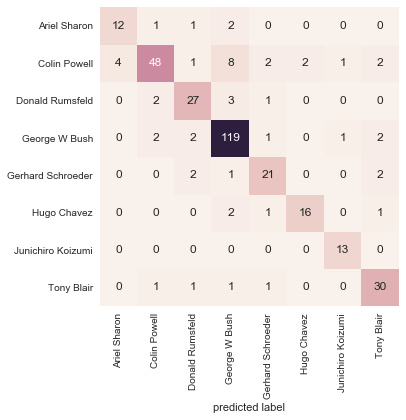

In [48]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(ytest,yfit)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
           xticklabels=faces.target_names,
           yticklabels=faces.target_names)
plt.xlabel('true label')
plt.xlabel('predicted label')

In [49]:
faces.target_names.shape

(8,)

In [50]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], 
      dtype='<U17')

In [51]:
ytest.shape

(337,)

In [55]:
yfit.shape

(337,)

In [58]:
mat

array([[ 12,   4,   0,   0,   0,   0,   0,   0],
       [  1,  48,   2,   2,   0,   0,   0,   1],
       [  1,   1,  27,   2,   2,   0,   0,   1],
       [  2,   8,   3, 119,   1,   2,   0,   1],
       [  0,   2,   1,   1,  21,   1,   0,   1],
       [  0,   2,   0,   0,   0,  16,   0,   0],
       [  0,   1,   0,   1,   0,   0,  13,   0],
       [  0,   2,   0,   2,   2,   1,   0,  30]])